<h1><center> Topic Modeling: UN Speeches
    
<center> 
    Justine Huỳnh
 
<center> 2021/10/21

In [43]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair
from dfply import *
from plotnine import *
import seaborn as sns
import missingno
import random

# Stopwords from sklearn
# Stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

#### Stopwords from nltk
import nltk
from nltk.corpus import stopwords
nltk_sw = stopwords.words("english")

#### Stopwrods from spacy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_sw

## Sentiemtn Analysis
import textblob
import vaderSentiment

# Count vectorizer for word frequencies
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Lemonizer
from nltk.stem.wordnet import WordNetLemmatizer
# Stemer
from nltk.stem import SnowballStemmer

# Topic modeling
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from gensim import corpora
import pickle # saves the object into a file
from transformers import pipeline
# Images
from IPython.display import Image, HTML

import warnings
warnings.filterwarnings("ignore")

In [28]:
# def get_lemma(word, myLemonizer = WordNetLemmatizer()):
#     '''
#     Lemmatizes the word
    
#     @param String word the given word to lemmatize
#     @param myLemonizer the given lemmatizer; optional
#     @return the newly lemmatized core word
#     '''
    
# #     print("word lemonizer", WordNetLemmatizer().lemmatize(word))
#     # Should I do stemming too? Hmmmm
#     return myLemonizer.lemmatize(word)

# def get_stemmer(word, myStemmer = SnowballStemmer(language = "english")):
#     '''
#     Stems the word
    
#     @param String word the given word to stem
#     @param myStemmer the given stemmer; optional
#     @return the newly stemmed core word
#     '''
#     return myStemmer.stem(word)
    

# def removePunctuation(word):
#     '''
#     Removes punctuation from a given word
    
#     @param String word the given word
#     @return the word, without punctuation
#     '''
    
#     lastIndex = len(word) - 1
#     if word[lastIndex] in myPunc:
#         # eradicate the last index value
#         return word[:-1]

#     return word
    

# def prepare_text_for_lda(text, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
#     '''
#     Tokenizes, splits, removes stopwords from the text.
#     Basically, preparing text for LDA (one type of topic model)
    
#     @param String text the given text
#     @param WordNetLemmatizer myLemonizer the given lemmatizer
#     @return the tokens
#     '''
#     text = text.lower()
    
#     # Split by spaces
#     tokens = text.split(" ")
    
#     # Stripping away newline characters and tabs
#     tokens = [word.strip("\n") for word in tokens]
#     tokens = [word.strip("\t") for word in tokens]
# #     tokens = [word.strip("\d") for word in tokens]
#     # Strip damn numbers
    
#     tokens = [token for token in tokens if len(token) > 1]
#     # a
    
#     tokens = [token for token in tokens if token not in both_sw]
# #     if "the" or "an" or "and" in tokens:
# # #         print(f"found the/an/and in: {tokens}")
# #         print("found the/an/and")
#     tokens = [get_lemma(token, myLemonizer) for token in tokens]
#     tokens = [get_stemmer(token, myStemmer) for token in tokens]
#     tokens = [removePunctuation(token) for token in tokens]
#     return tokens

# def getCleanedTokensList(data, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
#     '''
#     Gets cleaned tokens. 
#     Processes include: lowercasing, splitting by spaces, strips spaces/tabs/newlines,
#     punctuation, lemmatizing, stems
    
#     @param DataFrame data the given data frame
#     @param WordNetLemmatizer myLemonizer the given lemmatizer
#     @param SnowballStemmer myStemmer the given stemmer
#     @return the list of tokens for each speech
#     '''
#     text_data = []

#     for line in data:
#         tokens = prepare_text_for_lda(line, myLemonizer, myStemmer)
#         text_data.append(tokens)
#     return text_data


# def generate_viz(data, NUM_TOPICS=5, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
#     '''
#     Graphs the data by topic.
#     Also saves the files and model into other files
    
#     @param list data the given list of Strings
#     @param int NUM_TOPICS number of topics to graph; default set to 5
#     @param WordNetLemmatizer myLemonizer the given lemmatizer
#     @return the graph, dictionary, and corpus
#     '''
# #     text_data = []

# #     for line in data:
# #         tokens = prepare_text_for_lda(line, myLemonizer, myStemmer)
# #         text_data.append(tokens)
#     text_data = getCleanedTokensList(data, myLemonizer, myStemmer)

#     dictionary = corpora.Dictionary(text_data)
#     corpus = [dictionary.doc2bow(text) for text in text_data]
#     pickle.dump(corpus, open('corpus.pkl', 'wb'))
#     dictionary.save('dictionary.gensim')
#     ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state = 420)
#     ldamodel.save('model5.gensim')

#     topics = ldamodel.print_topics(num_words=4)
#     for topic in topics:
#         print(f"topic: {topic}")

#     dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
#     corpus = pickle.load(open('corpus.pkl', 'rb'))
#     lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

#     lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
#     return lda_display, dictionary, corpus


# What is Topic Modelling?

- Text-mining tool to understand the underyling structure of a document or corpus of text
- Groups words into topics
- Assigns documents to a couple of topics (usually unsupervised)


## Why is it useful?

- Look at broad topics discussed in a huge corpus
- Sees sementic underyling structure
- Difficult to do by hand

## Examples

- Reading law documents
- Identifying misinformation

## Cons
- Groups words, not concepts
    - ie: Writer Krist's vocabulary vs Writer Singto's vocabulary
- Need domain knowledge

In [29]:
# Reading data
speeches = pd.read_csv("un_gen_debates_text.csv", encoding = "utf-8")
print(f"{speeches.shape[0]} rows/speeches, {speeches.shape[1]} columns/parameters")

7507 rows/speeches, 7 columns/parameters


## Stopwords

Includes
- Punctuation
- Newlines, tabs, etc
- Special characters
- Over-frequent Words

In [30]:
# Stopword calculations
en_stop = set(nltk.corpus.stopwords.words('english'))

# Adding punctuation and special characters to stop words
specialChars = "!@#$%^&*()\'\"?.,~<>_-+{}[]|;"
myPunc = set(specialChars)
en_stop.update(myPunc)
en_stop.add('n\'t')

#### Combine nltk and spacy stopwords into one: both_sw
both_sw = set.union(en_stop, spacy_sw)

# Eradicating new lines, tabs, possessive
both_sw.update(["\n", "\t", "'s"])

# Eradicate words that appear in many documents, too
both_sw.update(["united", "states", "nation", "international", "state", "like", "would", "should", "country"])

print(f"Length of both nltk and spacy stopwords: {len(both_sw)}")

Length of both nltk and spacy stopwords: 418


In [70]:
def top_words_f(n_words):
    '''
    Extract the top words from each topic
    
    @param int n_words the number of top words to grab from each topic
    @return the resulting dataframe
    '''
    n_words=n_words
    imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]
    words_in_topic = ([imp_words(x) for x in lda.components_])
    main_topics = [' '.join(x) for x in words_in_topic]
#     df = pd.DataFrame(main_topics).T
#     df.columns = columns=["Topic_" + str(each) for each in range(lda.n_components)]
    df = pd.DataFrame({"top_words": main_topics},
                             index=["Topic_" + str(each) for each in range(lda.n_components)])
    return df

# Topic Modeling By Country

Choosing randomly select countries

## Philippines

In [71]:
HTML("Topic_Graphs_Country/Philippines.html")

#### China

In [72]:
HTML("Topic_Graphs_Country/China.html")

#### United States

In [73]:
HTML("Topic_Graphs_Country/United States.html")

#### United Kingdom

In [74]:
HTML("Topic_Graphs_Country/United Kingdom.html")

## Topic Modeling By Decade

#### 1980

In [75]:
HTML("Topic_Graphs_Year/1980.html")

#### 1990

In [76]:
HTML("Topic_Graphs_Year/1990.html")

#### 2000

In [77]:
HTML("Topic_Graphs_Year/2000.html")

#### 2015

In [78]:
HTML("Topic_Graphs_Year/2015.html")

### Steps

    1: Lemmatize and stem words
    2: Instantiate vectorizer with parameters: vec
    3: Vectorize column of text with fit_transform: myX
    4: Instantiate LDA model with parameters: lda
    5: Fit LDA model to vectorized text: doc_topics

In [69]:
# 1: create vectorizer
# countervectorizer transforms words into vectors!
vec = CountVectorizer(stop_words= both_sw, lowercase = True, min_df = 10, max_df = 0.7, ngram_range= (1,3))

# 2: create dtm
# myX = vec.fit_transform(speeches["text"])
myX = vec.fit_transform(speeches["text"])

# 3 create lda
lda = LatentDirichletAllocation(n_components= 4, learning_method= "online", random_state = 420)

# 4 fit lda
doc_topics = lda.fit_transform(myX)

# 5
print(f"There are {lda.components_.shape[0]} topics and {lda.components_.shape[1]} words")

There are 4 topics and 172292 words


### Common Topics

```
Top words in topic 0: africa south african co power republ independ oper struggl deleg

Top words in topic 1: south israel arab palestinian africa nuclear middl middl east iraq settlement

Top words in topic 2: cooper reform challeng intern sustain chang human right issu africa address

Top words in topic 3: nuclear republ soviet weapon co union arm european oper militari

```

- Topic 0: Power In Africa
- Topic 1: Israel-Palestinian Conflict
- Topic 2: Cooperation And Reform
- Topic 3: Nuclear War

In [84]:
voc = np.array(vec.get_feature_names())
numTopWords = 10
main_topics_df = top_words_f(numTopWords)

for i, each in enumerate(main_topics_df["top_words"]):
    print(f"Top words in topic {i}: {each}\n")

Top words in topic 0: africa south co developing countries south africa operation co operation delegation african namibia

Top words in topic 1: republic african america solidarity justice africa american central possible law

Top words in topic 2: arab israel nuclear republic relations palestinian military weapons soviet aggression

Top words in topic 3: cooperation human rights challenges change terrorism regional reform sustainable climate poverty



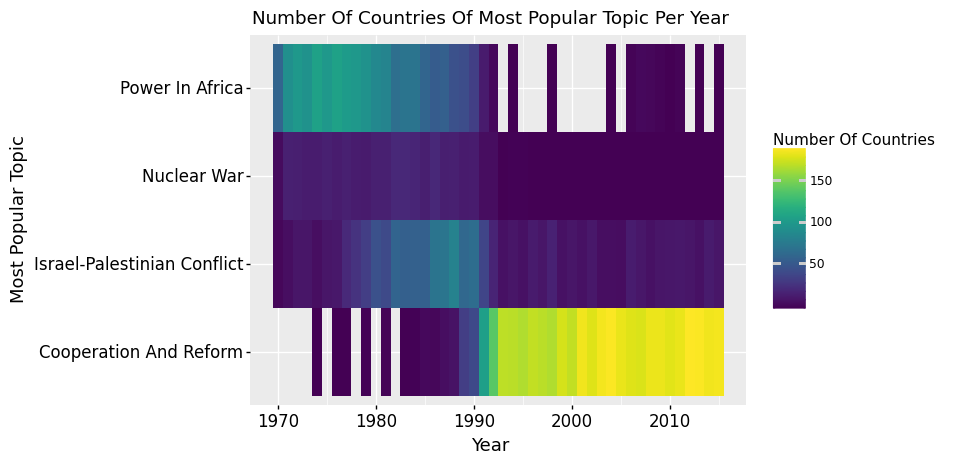

In [85]:
Image("topicsPerYear.png")

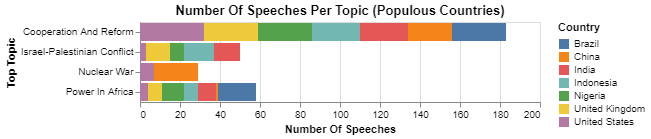

In [89]:
Image("NumSpeechesPerTopic_Big.png", height = 600, width = 600)
# HTML("NumSpeechesPerTopic_Populous.html")

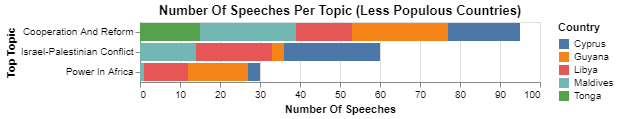

In [90]:
Image("NumSpeechesPerTopic_Small.png", height = 600, width = 600)

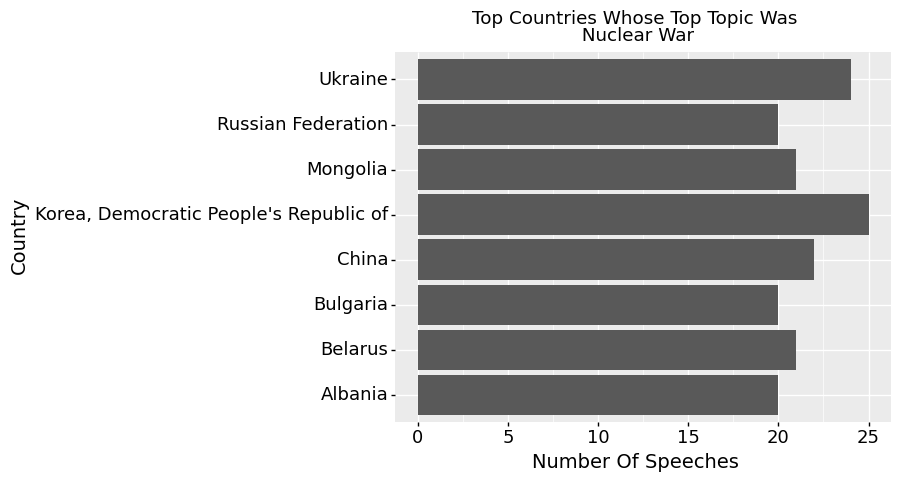

In [93]:
Image("Top_Countries_Nuclear_War.png")

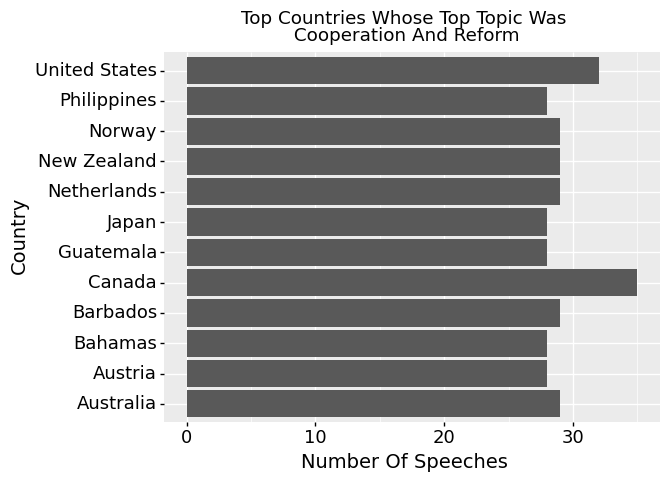

In [95]:
Image("Top_Countries_Coop.png", width = 700)

# Summary

### 4 Main Topics

- Power In Africa
- Israel-Palestinian Conflict
- Cooperation And Reform
- Nuclear War

Pre 1990s: Power/Independence in Africa

Post 1995: Cooperation and reform

Topic Modeling is messy.

jupyter nbconvert Presentation_Topic_Modeling.ipynb --to slides --no-prompt --TagRemovePreprocessor.remove_input_tags={\\"to_remove\\"} --post serve --SlidesExporter.reveal_theme=simple
 
 Note: don't forget the backslash to escape the quotation marks!